<a href="https://colab.research.google.com/github/manivenkatasai9494/tekworks/blob/main/ML/marketing_campaign(k_mean).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/marketing_campaign1.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [4]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

<ipython-input-4-de887df94f9b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace = True)


In [5]:
df.isnull().sum()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
numeric_data = df.select_dtypes(include=[np.number])


In [7]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(numeric_data)

In [8]:
# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [9]:
# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

Final Centroids (Cluster Centers):
[[5.54106812e+03 1.97073003e+03 3.53668251e+04 7.07317073e-01
  4.84440706e-01 4.92582002e+01 8.75130362e+01 7.54667788e+00
  4.02918419e+01 1.19243061e+01 8.11942809e+00 2.46417157e+01
  2.44407065e+00 2.83179142e+00 9.19259882e-01 3.73843566e+00
  6.60807401e+00 8.32632464e-02 2.60723297e-02 1.68208579e-03
  5.04625736e-03 3.36417157e-03 1.17746005e-02 3.00000000e+00
  1.10000000e+01 1.11858705e-01]
 [5.64996004e+03 1.96662892e+03 7.13441370e+04 1.46527117e-01
  5.30922931e-01 4.89410086e+01 5.48775452e+02 4.75204567e+01
  3.10238820e+02 6.64881066e+01 4.84938154e+01 6.59467174e+01
  2.19029496e+00 5.50237869e+00 4.63368221e+00 8.11132255e+00
  3.85537583e+00 6.08943863e-02 1.29400571e-01 1.53187441e-01
  1.31303520e-01 2.47383444e-02 6.66032350e-03 3.00000000e+00
  1.10000000e+01 1.91246432e-01]]


In [10]:
print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")


Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 1
Point C: Cluster 2
Point D: Cluster 1
Point E: Cluster 2
Point F: Cluster 2
Point G: Cluster 2
Point H: Cluster 1
Point I: Cluster 1
Point J: Cluster 1
Point K: Cluster 1
Point L: Cluster 1
Point M: Cluster 2
Point N: Cluster 2
Point O: Cluster 1
Point P: Cluster 2
Point Q: Cluster 1
Point R: Cluster 1
Point S: Cluster 2
Point T: Cluster 1
Point U: Cluster 1
Point V: Cluster 1
Point W: Cluster 2
Point X: Cluster 2
Point Y: Cluster 1
Point Z: Cluster 1
Point [: Cluster 1
Point \: Cluster 1
Point ]: Cluster 1
Point ^: Cluster 2
Point _: Cluster 1
Point `: Cluster 1
Point a: Cluster 1
Point b: Cluster 1
Point c: Cluster 2
Point d: Cluster 1
Point e: Cluster 2
Point f: Cluster 1
Point g: Cluster 1
Point h: Cluster 1
Point i: Cluster 2
Point j: Cluster 1
Point k: Cluster 1
Point l: Cluster 1
Point m: Cluster 1
Point n: Cluster 2
Point o: Cluster 1
Point p: Cluster 1
Point q: Cluster 1
Point r: Cluster 2
Point s: Cluster 2
Point t: 

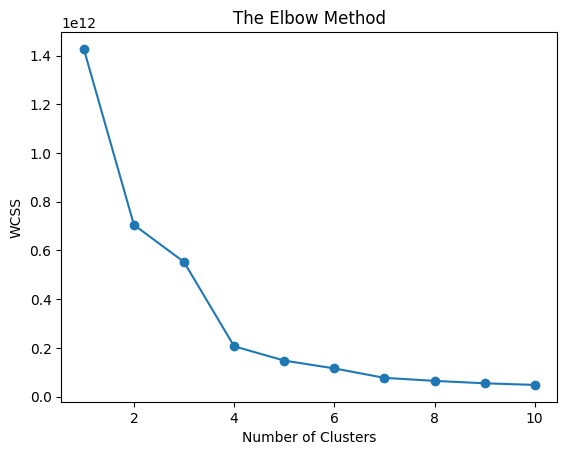

In [11]:
X = numeric_data
wcss = []

# Test different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the wcss

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()